In [ ]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Creation of Synthetic data

In [ ]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate base data
n = 1000
data = pd.DataFrame()
data['ID'] = range(1, n+1)
data['Age'] = np.random.randint(5, 26, size=n)
data['Sex'] = np.random.choice(['Male', 'Female'], size=n, p=[0.5, 0.5])
data['Area'] = np.random.choice(['Urban', 'Rural'], size=n, p=[0.3, 0.7])
data['IncomeLevel'] = np.random.choice(['Poorest', 'Poor', 'Middle', 'Rich', 'Richest'],
                                       size=n,
                                       p=[0.25, 0.35, 0.25, 0.1, 0.05])

# Literacy assignment
def assign_literacy(row):
    if row['IncomeLevel'] in ['Rich', 'Richest'] or row['Area'] == 'Urban':
        return np.random.choice(['Yes', 'No'], p=[0.9, 0.1])
    elif row['IncomeLevel'] == 'Middle':
        return np.random.choice(['Yes', 'No'], p=[0.75, 0.25])
    else:
        return np.random.choice(['Yes', 'No'], p=[0.6, 0.4])

# ICT Access assignment
def assign_ict(row):
    if row['IncomeLevel'] in ['Rich', 'Richest'] and row['Area'] == 'Urban':
        return np.random.choice(['Yes', 'No'], p=[0.95, 0.05])
    elif row['IncomeLevel'] == 'Middle':
        return np.random.choice(['Yes', 'No'], p=[0.6, 0.4])
    else:
        if row['Sex'] == 'Female':
            return np.random.choice(['Yes', 'No'], p=[0.2, 0.8])
        else:
            return np.random.choice(['Yes', 'No'], p=[0.35, 0.65])

# Education level assignment
def assign_edu(row):
    probs = {
        'Poorest':     [0.15, 0.5, 0.25, 0.08, 0.02],
        'Poor':        [0.1, 0.4, 0.3, 0.15, 0.05],
        'Middle':      [0.05, 0.25, 0.35, 0.25, 0.1],
        'Rich':        [0.01, 0.1, 0.3, 0.4, 0.19],
        'Richest':     [0.0, 0.05, 0.15, 0.45, 0.35]
    }
    return np.random.choice(
        ['None', 'Primary', 'Lower Secondary', 'Upper Secondary', 'Tertiary'],
        p=probs[row['IncomeLevel']]
    )

# Dropout stage assignment
def assign_dropout(row):
    if row['EducationLevel'] == 'None':
        return 'After Primary'
    elif row['EducationLevel'] == 'Primary':
        return np.random.choice(['None', 'After Primary'], p=[0.4, 0.6])
    elif row['EducationLevel'] == 'Lower Secondary':
        return np.random.choice(['None', 'Lower Secondary'], p=[0.6, 0.4])
    elif row['EducationLevel'] == 'Upper Secondary':
        if row['Sex'] == 'Female':
            return np.random.choice(['None', 'Upper Secondary'], p=[0.7, 0.3])
        else:
            return np.random.choice(['None', 'Upper Secondary'], p=[0.9, 0.1])
    else:
        return 'None'

# New: School infrastructure score assignment
def assign_infra_score(row):
    if row['Area'] == 'Urban':
        if row['IncomeLevel'] in ['Rich', 'Richest']:
            return np.random.randint(8, 11)
        elif row['IncomeLevel'] == 'Middle':
            return np.random.randint(6, 9)
        else:
            return np.random.randint(4, 7)
    else:  # Rural
        if row['IncomeLevel'] in ['Rich', 'Richest']:
            return np.random.randint(6, 9)
        elif row['IncomeLevel'] == 'Middle':
            return np.random.randint(3, 7)
        else:
            return np.random.randint(1, 5)

# Apply all assignments
data['Literacy'] = data.apply(assign_literacy, axis=1)
data['ICTAccess'] = data.apply(assign_ict, axis=1)
data['EducationLevel'] = data.apply(assign_edu, axis=1)
data['DropoutStage'] = data.apply(assign_dropout, axis=1)
data['SchoolInfrastructureScore'] = data.apply(assign_infra_score, axis=1)

# Done! 🎓💡


Check Data

In [ ]:
data.sample(3)

,ID,Age,Sex,Area,IncomeLevel,Literacy,ICTAccess,EducationLevel,DropoutStage,SchoolInfrastructureScore
350,351,21,Female,Rural,Poor,No,No,Upper Secondary,Upper Secondary,4
122,123,13,Male,Rural,Rich,Yes,Yes,Tertiary,None,8
172,173,16,Male,Rural,Poorest,Yes,Yes,Lower Secondary,None,4


Visualizations

/tmp/ipython-input-24-2514746559.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IncomeLevel', data=data, ax=axes[0, 0],
/tmp/ipython-input-24-2514746559.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Literacy', y='ICTAccess', data=literacy_ict_proportion, ax=axes[0, 1], palette="magma")
/tmp/ipython-input-24-2514746559.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Area', y='ICTAccess', data=area_ict_proportion, ax=axes[1, 1], palette="plasma")
/tmp/ipython-input-24-2514746559.py:41: FutureWarning: 

Passing `pal

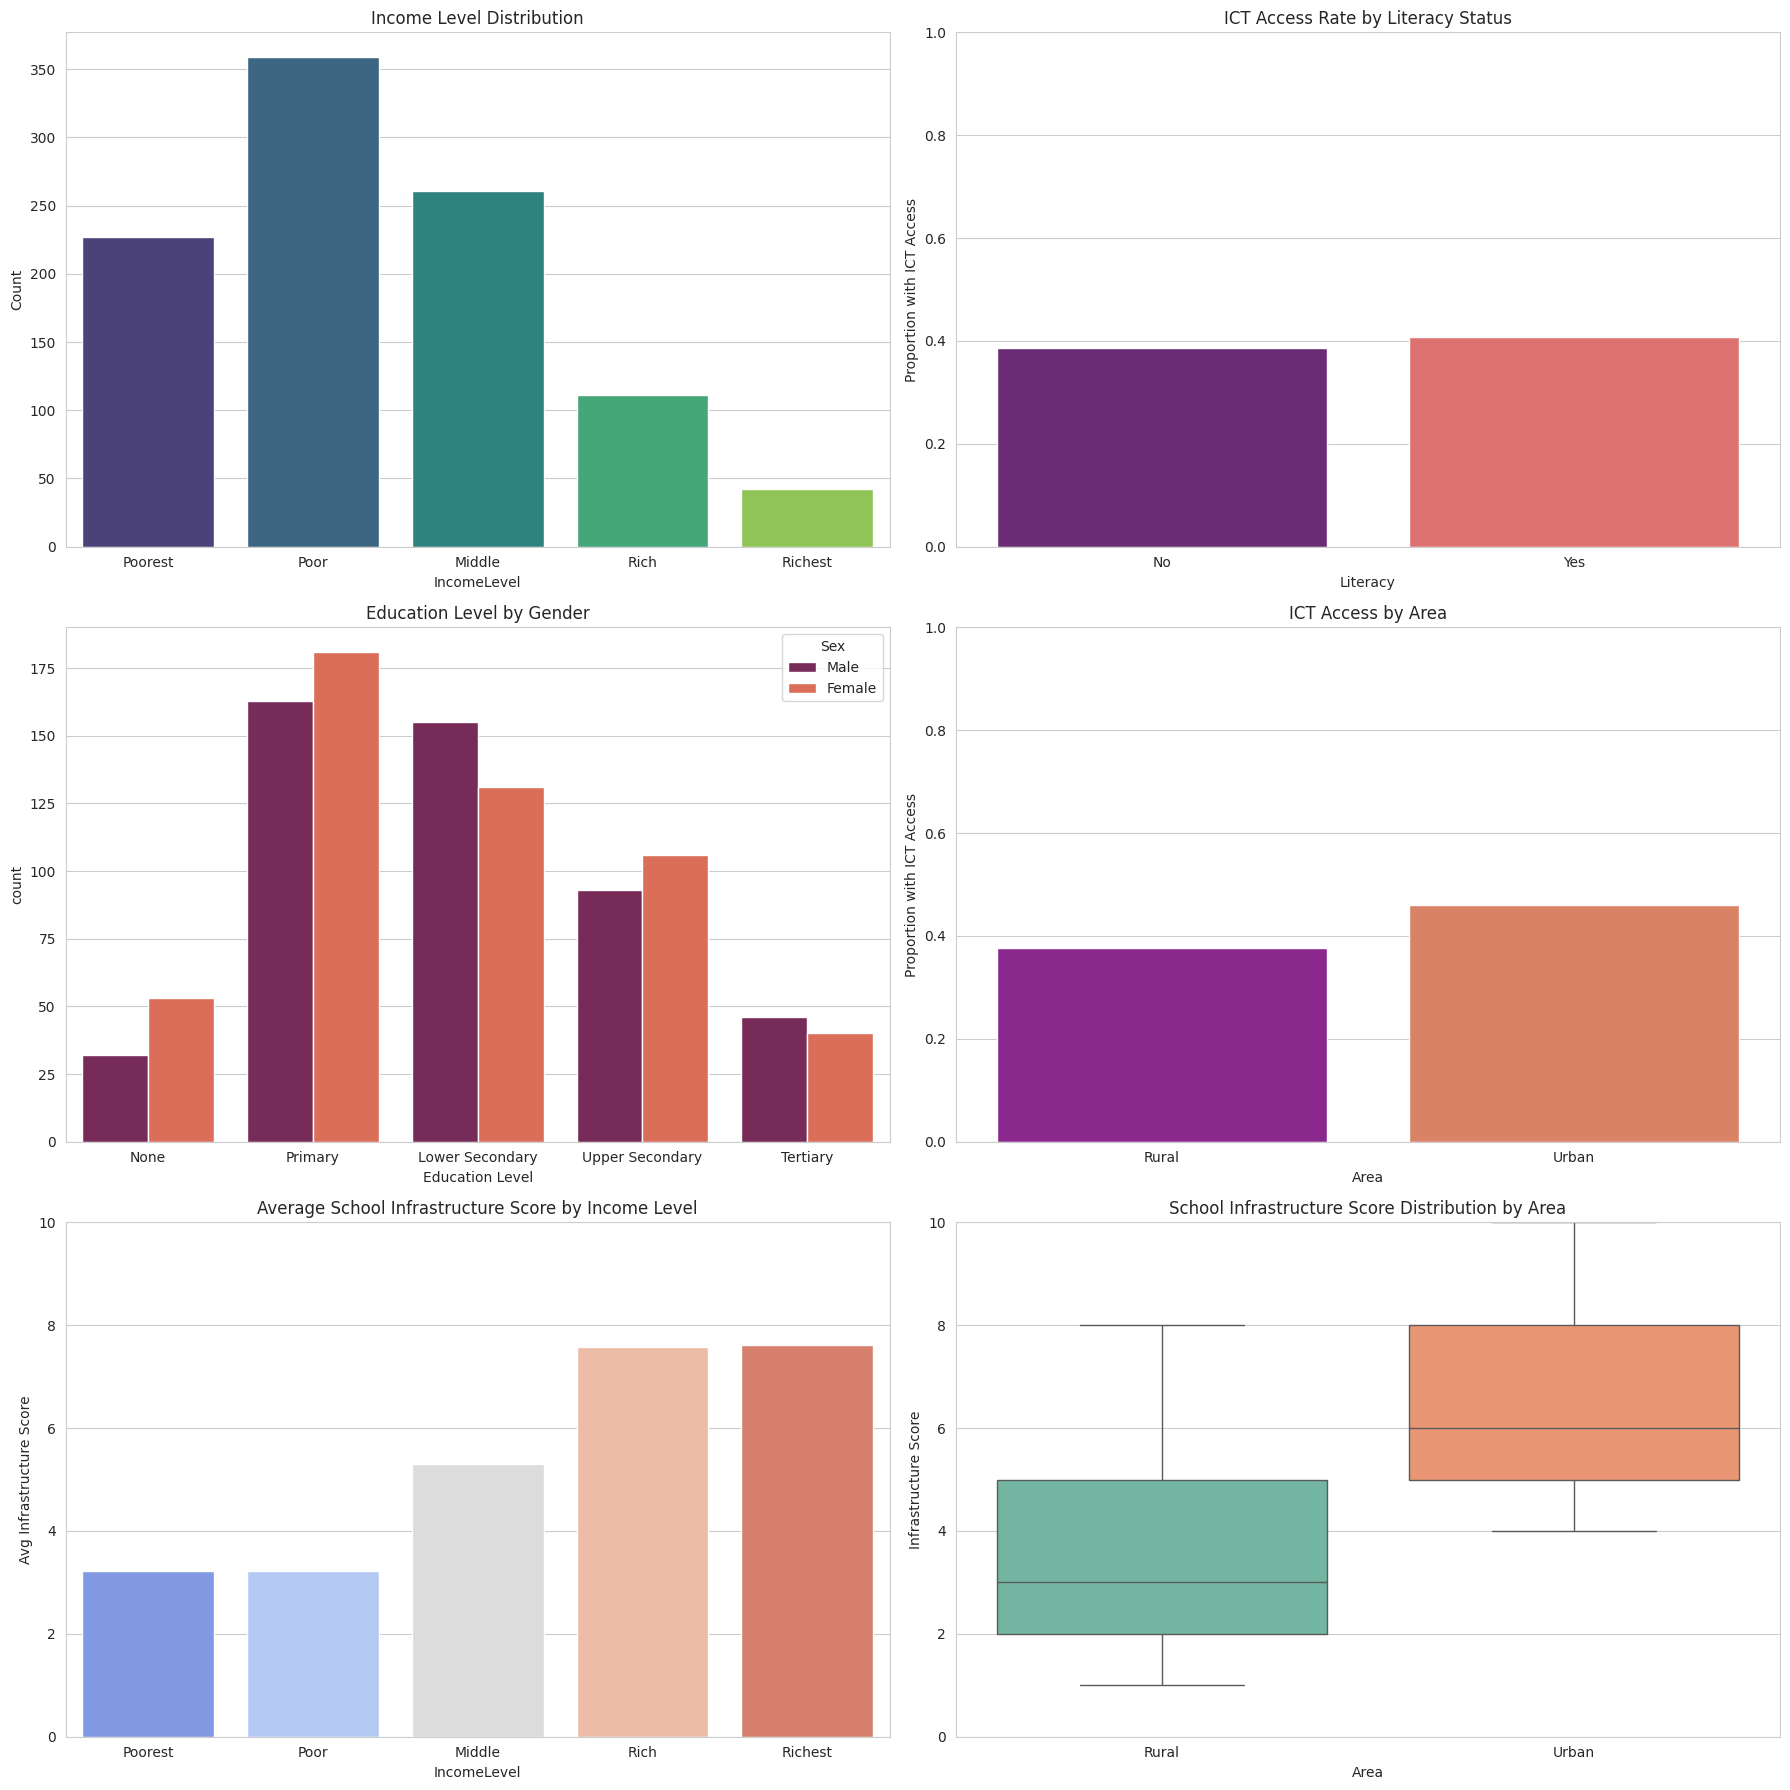

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 16)

# Create subplots: 3 rows x 2 columns for 6 plots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# 1. Income Level distribution
sns.countplot(x='IncomeLevel', data=data, ax=axes[0, 0],
              order=['Poorest', 'Poor', 'Middle', 'Rich', 'Richest'],
              palette="viridis")
axes[0, 0].set_title('Income Level Distribution')
axes[0, 0].set_ylabel('Count')

# 2. ICT Access Rate by Literacy
literacy_ict_proportion = data.groupby('Literacy')['ICTAccess'].apply(lambda x: (x == 'Yes').mean()).reset_index()
sns.barplot(x='Literacy', y='ICTAccess', data=literacy_ict_proportion, ax=axes[0, 1], palette="magma")
axes[0, 1].set_title('ICT Access Rate by Literacy Status')
axes[0, 1].set_ylabel('Proportion with ICT Access')
axes[0, 1].set_ylim(0, 1)

# 3. Education Level by Gender
sns.countplot(x='EducationLevel', hue='Sex', data=data,
              order=['None', 'Primary', 'Lower Secondary', 'Upper Secondary', 'Tertiary'],
              ax=axes[1, 0], palette="rocket")
axes[1, 0].set_title('Education Level by Gender')
axes[1, 0].set_xlabel('Education Level')

# 4. ICT Access by Area
area_ict_proportion = data.groupby('Area')['ICTAccess'].apply(lambda x: (x == 'Yes').mean()).reset_index()
sns.barplot(x='Area', y='ICTAccess', data=area_ict_proportion, ax=axes[1, 1], palette="plasma")
axes[1, 1].set_title('ICT Access by Area')
axes[1, 1].set_ylabel('Proportion with ICT Access')
axes[1, 1].set_ylim(0, 1)

# 5. Avg Infrastructure Score by Income Level
infra_by_income = data.groupby('IncomeLevel')['SchoolInfrastructureScore'].mean().reset_index()
sns.barplot(x='IncomeLevel', y='SchoolInfrastructureScore', data=infra_by_income,
            order=['Poorest', 'Poor', 'Middle', 'Rich', 'Richest'],
            ax=axes[2, 0], palette="coolwarm")
axes[2, 0].set_title('Average School Infrastructure Score by Income Level')
axes[2, 0].set_ylabel('Avg Infrastructure Score')
axes[2, 0].set_ylim(0, 10)

# 6. Infrastructure Score Distribution by Area
sns.boxplot(x='Area', y='SchoolInfrastructureScore', data=data, ax=axes[2, 1], palette="Set2")
axes[2, 1].set_title('School Infrastructure Score Distribution by Area')
axes[2, 1].set_ylabel('Infrastructure Score')
axes[2, 1].set_ylim(0, 10)

# Layout
plt.tight_layout()
plt.show()


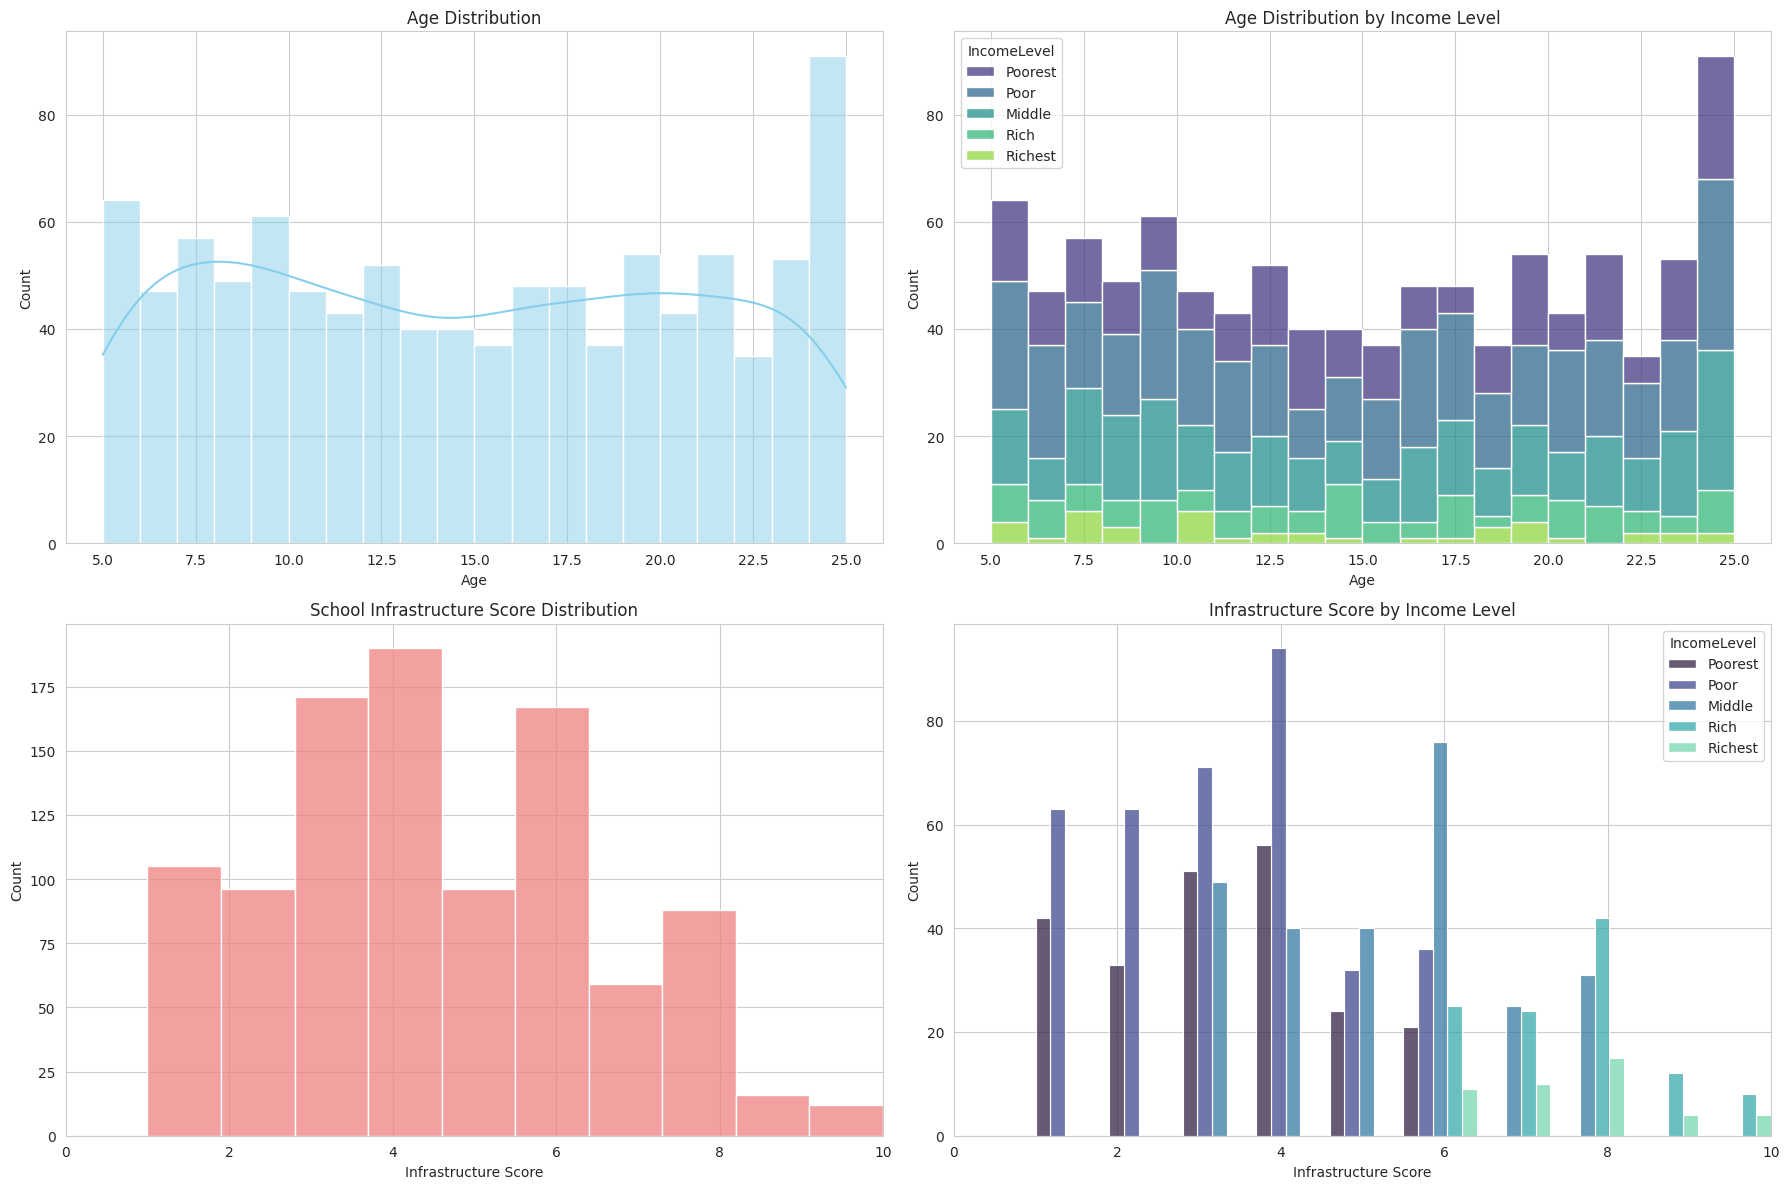

In [ ]:
# 2. Histograms
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Age Distribution
sns.histplot(data['Age'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')

# 2. Age Distribution by Income Level
sns.histplot(data=data, x='Age', hue='IncomeLevel',
             multiple='stack', bins=20, ax=axes[0, 1],
             hue_order=['Poorest', 'Poor', 'Middle', 'Rich', 'Richest'],
             palette='viridis')
axes[0, 1].set_title('Age Distribution by Income Level')
axes[0, 1].set_xlabel('Age')

# 3. Infrastructure Score Distribution
sns.histplot(data['SchoolInfrastructureScore'], bins=10, kde=False, ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('School Infrastructure Score Distribution')
axes[1, 0].set_xlabel('Infrastructure Score')
axes[1, 0].set_xlim(0, 10)

# 4. Infrastructure Score by Income Level (Overlay)
sns.histplot(data=data, x='SchoolInfrastructureScore', hue='IncomeLevel',
             multiple='dodge', bins=10, ax=axes[1, 1],
             hue_order=['Poorest', 'Poor', 'Middle', 'Rich', 'Richest'],
             palette='mako')
axes[1, 1].set_title('Infrastructure Score by Income Level')
axes[1, 1].set_xlabel('Infrastructure Score')
axes[1, 1].set_xlim(0, 10)

plt.tight_layout()
plt.show()

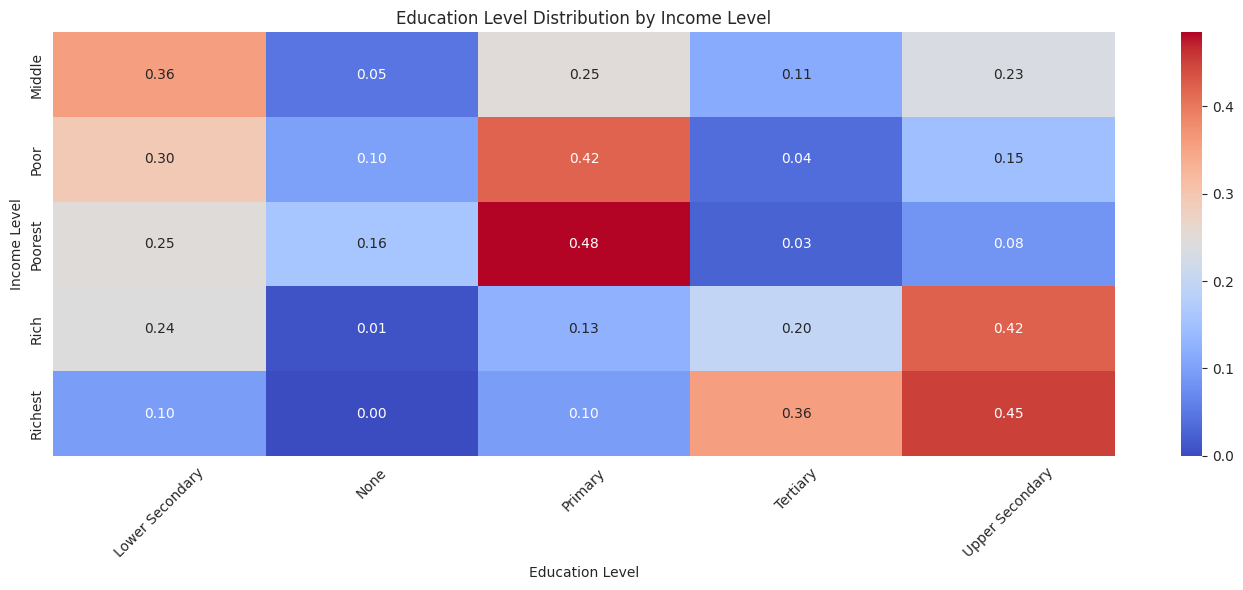

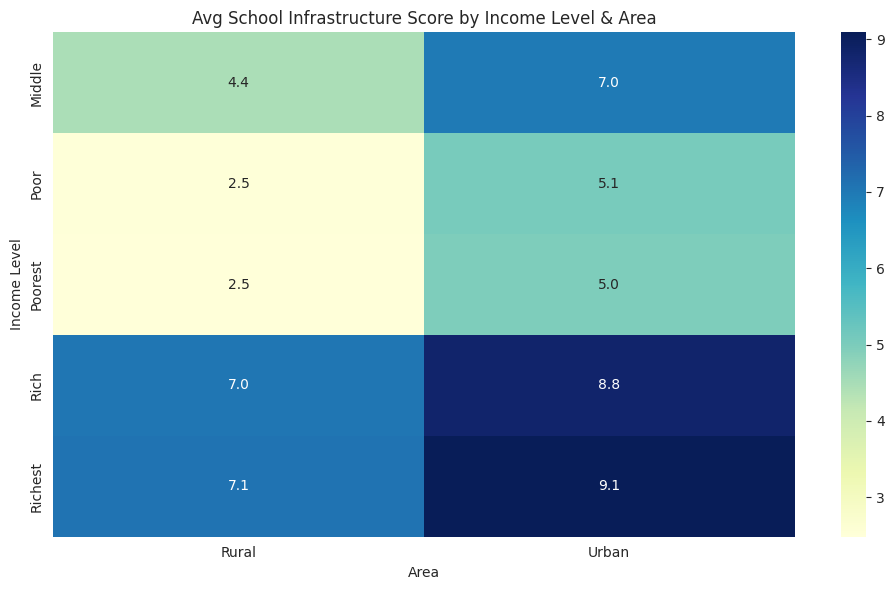

In [ ]:

# 1. Education Level Distribution by Income Level
cross_tab = pd.crosstab(index=data['IncomeLevel'],
                        columns=data['EducationLevel'],
                        normalize='index')

plt.figure(figsize=(14, 6))
sns.heatmap(cross_tab, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Education Level Distribution by Income Level')
plt.xlabel('Education Level')
plt.ylabel('Income Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Avg Infrastructure Score by Income Level and Area
infra_pivot = data.pivot_table(values='SchoolInfrastructureScore',
                               index='IncomeLevel',
                               columns='Area',
                               aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(infra_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Avg School Infrastructure Score by Income Level & Area')
plt.xlabel('Area')
plt.ylabel('Income Level')
plt.tight_layout()
plt.show()


/tmp/ipython-input-27-1851908558.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IncomeLevel', y='Age', data=data,
/tmp/ipython-input-27-1851908558.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EducationLevel', y='ICTAccess', data=edu_ict_proportion,
/tmp/ipython-input-27-1851908558.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EducationLevel', y='SchoolInfrastructureScore', data=data,
/tmp/ipython-input-27-1851908558.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

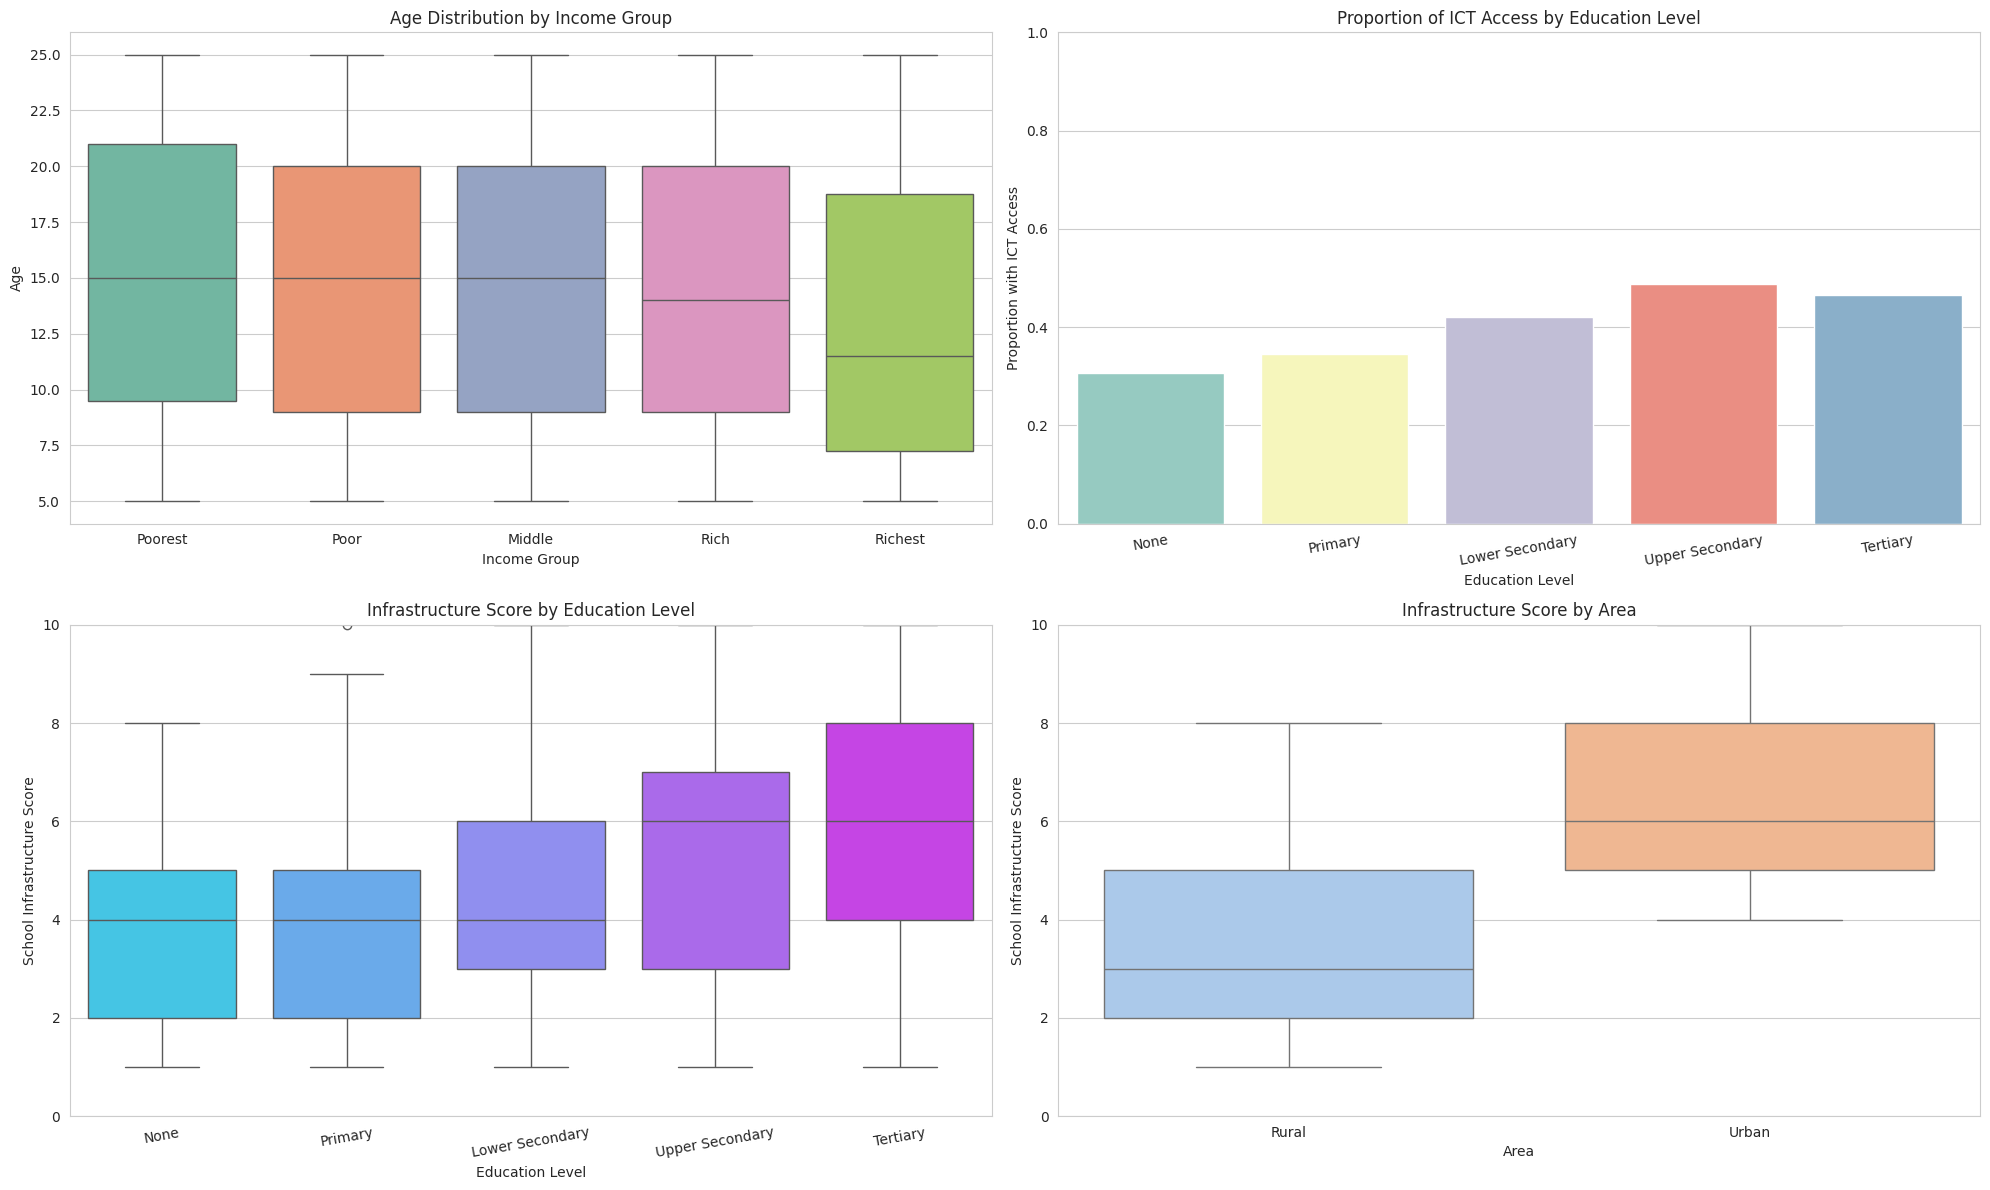

In [ ]:
# 4. Box Plots + Bar Plot + Bonus Box Plots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))  # 2 rows, 2 columns

# 1. Age Distribution by Income Group (Boxplot)
sns.boxplot(x='IncomeLevel', y='Age', data=data,
            order=['Poorest', 'Poor', 'Middle', 'Rich', 'Richest'],
            ax=axes[0, 0], palette="Set2")
axes[0, 0].set_title('Age Distribution by Income Group')
axes[0, 0].set_xlabel('Income Group')
axes[0, 0].set_ylabel('Age')

# 2. ICT Access Proportion by Education Level (Barplot)
edu_ict_proportion = data.groupby('EducationLevel')['ICTAccess'] \
                         .apply(lambda x: (x == 'Yes').mean()).reset_index()

sns.barplot(x='EducationLevel', y='ICTAccess', data=edu_ict_proportion,
            order=['None', 'Primary', 'Lower Secondary', 'Upper Secondary', 'Tertiary'],
            palette="Set3", ax=axes[0, 1])
axes[0, 1].set_title('Proportion of ICT Access by Education Level')
axes[0, 1].set_xlabel('Education Level')
axes[0, 1].set_ylabel('Proportion with ICT Access')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].tick_params(axis='x', rotation=10)

# 3. Infrastructure Score by Education Level (Boxplot)
sns.boxplot(x='EducationLevel', y='SchoolInfrastructureScore', data=data,
            order=['None', 'Primary', 'Lower Secondary', 'Upper Secondary', 'Tertiary'],
            ax=axes[1, 0], palette="cool")
axes[1, 0].set_title('Infrastructure Score by Education Level')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('School Infrastructure Score')
axes[1, 0].set_ylim(0, 10)
axes[1, 0].tick_params(axis='x', rotation=10)

# 4. Infrastructure Score by Area (Boxplot)
sns.boxplot(x='Area', y='SchoolInfrastructureScore', data=data,
            ax=axes[1, 1], palette="pastel")
axes[1, 1].set_title('Infrastructure Score by Area')
axes[1, 1].set_xlabel('Area')
axes[1, 1].set_ylabel('School Infrastructure Score')
axes[1, 1].set_ylim(0, 10)

plt.tight_layout()
plt.show()

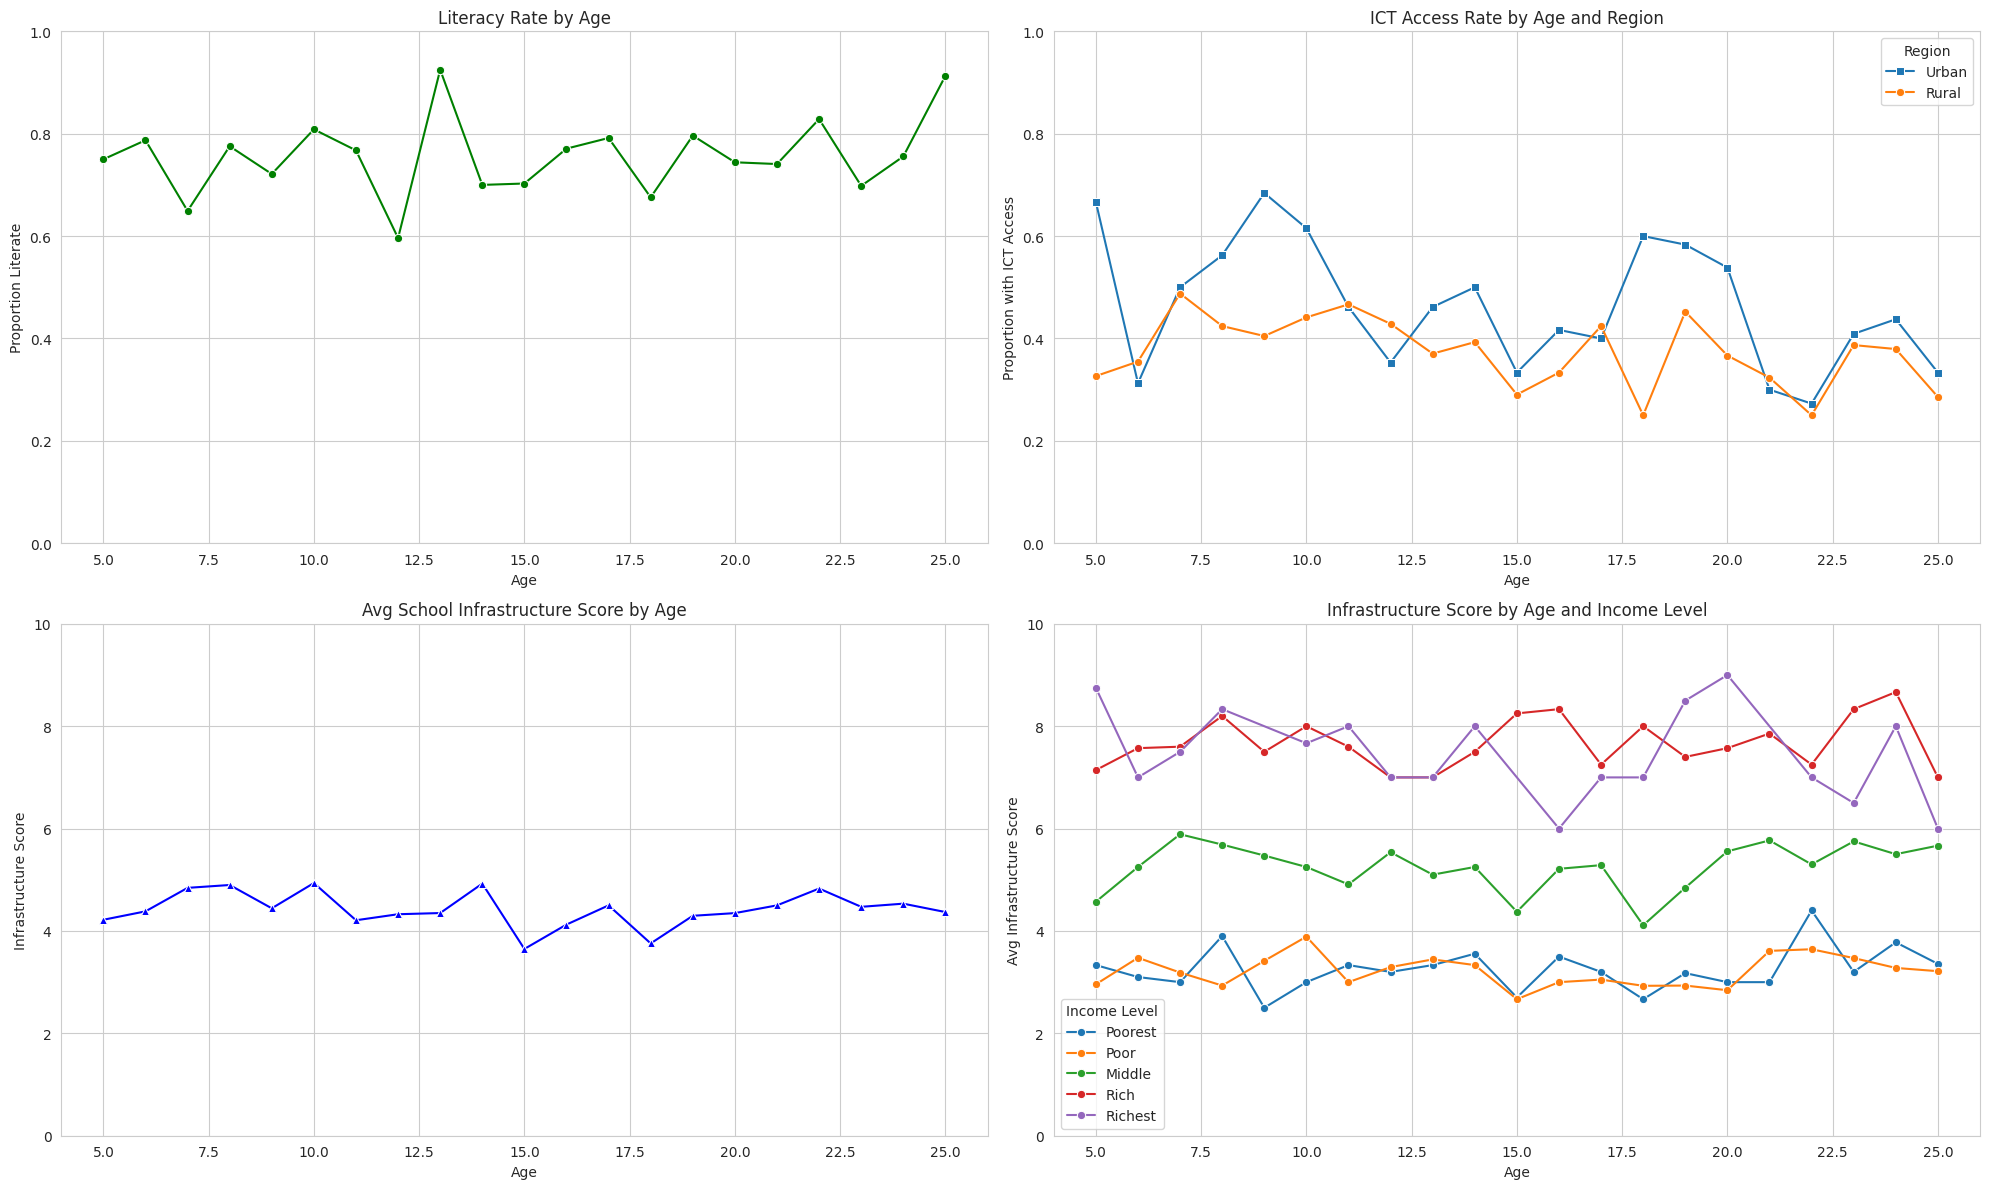

In [ ]:
# 5. Trend Lines
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# 1. Literacy Rate by Age
literacy_by_age = data.groupby('Age')['Literacy'].apply(lambda x: (x == 'Yes').mean()).reset_index()
sns.lineplot(x='Age', y='Literacy', data=literacy_by_age, ax=axes[0, 0],
             marker='o', color='green')
axes[0, 0].set_title('Literacy Rate by Age')
axes[0, 0].set_ylabel('Proportion Literate')
axes[0, 0].set_ylim(0, 1)

# 2. ICT Access by Age (Urban vs Rural)
urban_ict = data[data['Area'] == 'Urban'].groupby('Age')['ICTAccess'].apply(lambda x: (x == 'Yes').mean())
rural_ict = data[data['Area'] == 'Rural'].groupby('Age')['ICTAccess'].apply(lambda x: (x == 'Yes').mean())
sns.lineplot(x=urban_ict.index, y=urban_ict.values, ax=axes[0, 1],
             marker='s', label='Urban')
sns.lineplot(x=rural_ict.index, y=rural_ict.values, ax=axes[0, 1],
             marker='o', label='Rural')
axes[0, 1].set_title('ICT Access Rate by Age and Region')
axes[0, 1].set_ylabel('Proportion with ICT Access')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].legend(title='Region')

# 3. Infrastructure Score by Age
infra_by_age = data.groupby('Age')['SchoolInfrastructureScore'].mean().reset_index()
sns.lineplot(x='Age', y='SchoolInfrastructureScore', data=infra_by_age,
             ax=axes[1, 0], marker='^', color='blue')
axes[1, 0].set_title('Avg School Infrastructure Score by Age')
axes[1, 0].set_ylabel('Infrastructure Score')
axes[1, 0].set_ylim(0, 10)

# 4. Infrastructure Score by Income Level and Age
income_levels = ['Poorest', 'Poor', 'Middle', 'Rich', 'Richest']
for level in income_levels:
    subset = data[data['IncomeLevel'] == level]
    infra_trend = subset.groupby('Age')['SchoolInfrastructureScore'].mean()
    sns.lineplot(x=infra_trend.index, y=infra_trend.values,
                 ax=axes[1, 1], marker='o', label=level)

axes[1, 1].set_title('Infrastructure Score by Age and Income Level')
axes[1, 1].set_ylabel('Avg Infrastructure Score')
axes[1, 1].set_ylim(0, 10)
axes[1, 1].legend(title='Income Level')

plt.tight_layout()
plt.show()


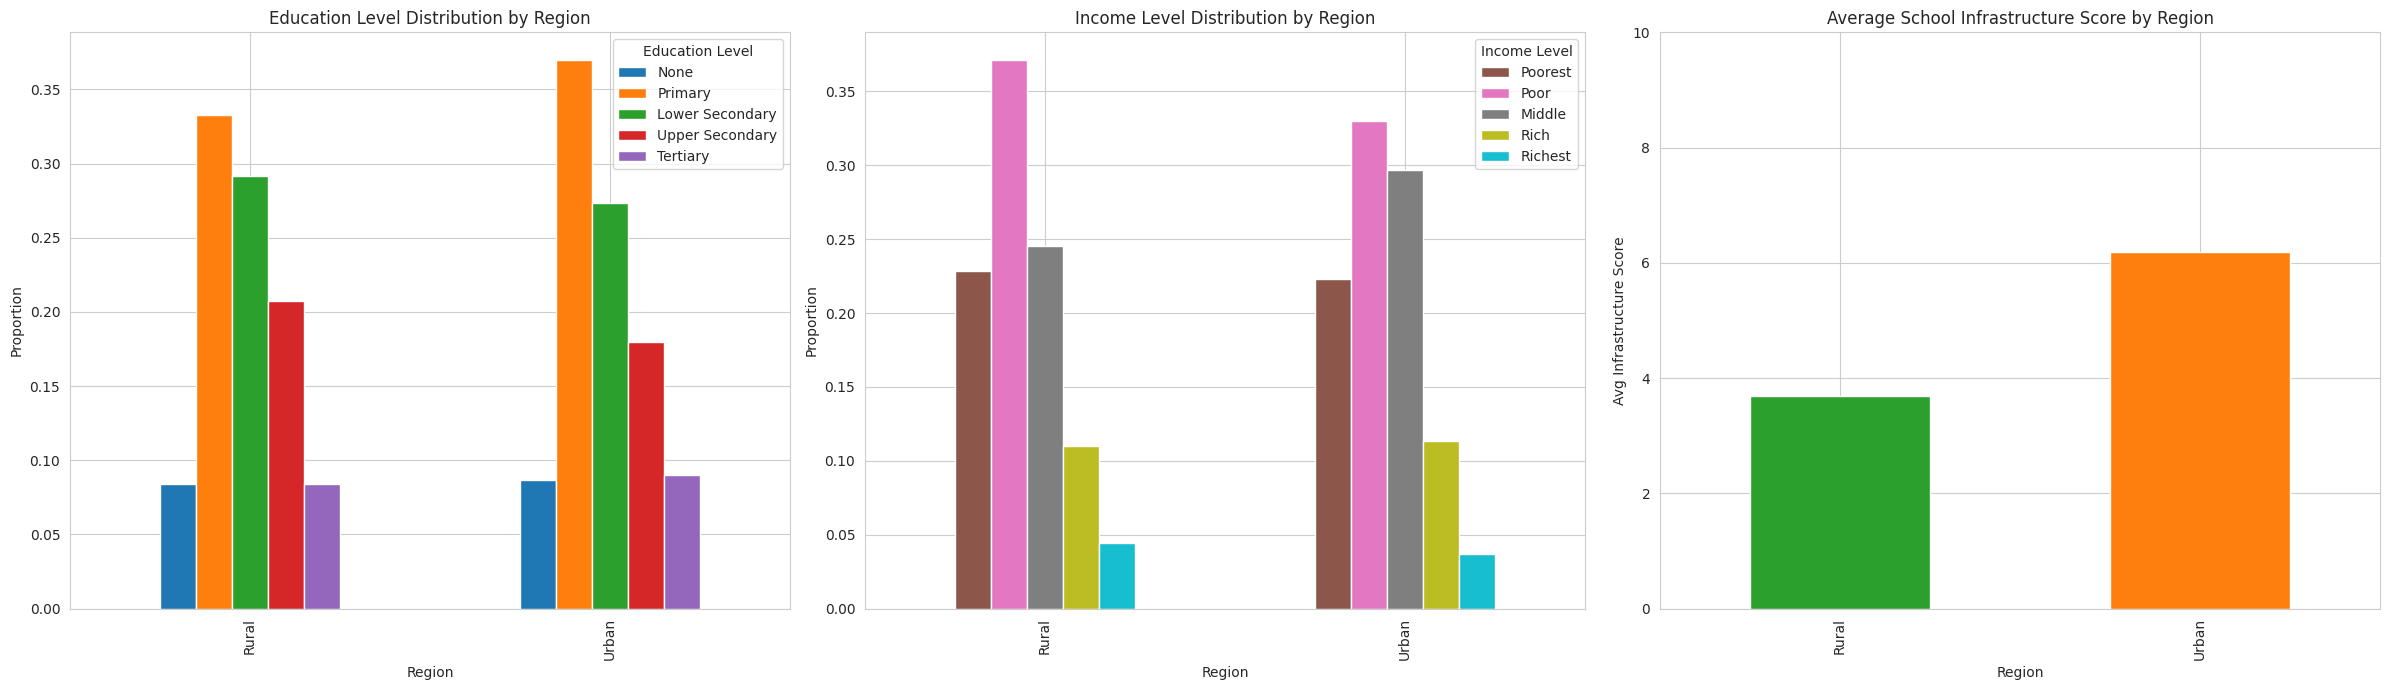

In [ ]:
# 6. Regional Comparisons
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# 1. Education Level Distribution by Region
edu_by_area = data.groupby('Area')['EducationLevel'].value_counts(normalize=True).unstack()
edu_by_area = edu_by_area[['None','Primary','Lower Secondary','Upper Secondary','Tertiary']]
edu_by_area.plot(kind='bar', ax=axes[0],
                 color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
axes[0].set_title('Education Level Distribution by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Education Level')

# 2. Income Level Distribution by Region
income_by_area = data.groupby('Area')['IncomeLevel'].value_counts(normalize=True).unstack()
income_by_area = income_by_area[['Poorest','Poor','Middle','Rich','Richest']]
income_by_area.plot(kind='bar', ax=axes[1],
                    color=['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes[1].set_title('Income Level Distribution by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Proportion')
axes[1].legend(title='Income Level')

# 3. Average Infrastructure Score by Region
infra_by_area = data.groupby('Area')['SchoolInfrastructureScore'].mean()
infra_by_area.plot(kind='bar', ax=axes[2], color=['#2ca02c', '#ff7f0e'])
axes[2].set_title('Average School Infrastructure Score by Region')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Avg Infrastructure Score')
axes[2].set_ylim(0, 10)

plt.tight_layout()
plt.show()

One Hot Encoding

In [ ]:
# Select columns for one-hot encoding
cols_to_encode = ['Sex', 'Area', 'IncomeLevel', 'Literacy', 'ICTAccess', 'EducationLevel', 'DropoutStage']

# Perform one-hot encoding
data = pd.get_dummies(data, columns=cols_to_encode)

In [ ]:
data.sample(3)

,ID,Age,SchoolInfrastructureScore,Sex_Female,Sex_Male,Area_Rural,Area_Urban,IncomeLevel_Middle,IncomeLevel_Poor,IncomeLevel_Poorest,...,ICTAccess_Yes,EducationLevel_Lower Secondary,EducationLevel_None,EducationLevel_Primary,EducationLevel_Tertiary,EducationLevel_Upper Secondary,DropoutStage_After Primary,DropoutStage_Lower Secondary,DropoutStage_None,DropoutStage_Upper Secondary
118,119,5,4,True,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
40,41,18,5,True,False,False,True,False,False,True,...,False,False,False,True,False,False,True,False,False,False
243,244,7,3,False,True,True,False,True,False,False,...,True,False,False,False,True,False,False,False,True,False


Machine Learning Model

In [ ]:
from sklearn.model_selection import train_test_split

# Set your target variable
target_col = 'DropoutStage_None'  # True = did not drop out, False = dropped out
X = data.drop(columns=[target_col])
y = data[target_col]

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Initialize and train
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Accuracy and F1 Score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0000
F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        97
        True       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


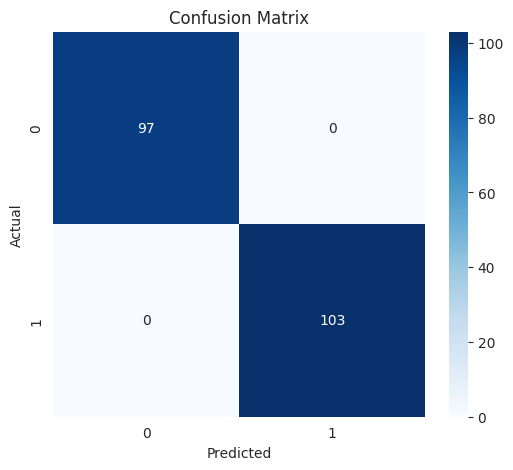

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()